### 1110_과제_이준기

1. 지구온난화 추세 (대구 + 다른 지역)

In [23]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [24]:
## 데이터 준비
DATA_FILE = '../data/대구 100년.csv'

daeguDF = pd.read_csv(DATA_FILE, skiprows=7)
daeguDF.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1925-01-01,143.0,-1.5,-4.5,1.3
1,\t1925-01-02,143.0,-0.3,-6.1,5.0
2,\t1925-01-03,143.0,-1.9,-4.3,1.4
3,\t1925-01-04,143.0,-3.3,-6.3,0.1
4,\t1925-01-05,143.0,-2.0,-6.7,1.3


In [25]:
# 데이터 전처리
daeguDF = daeguDF.drop('지점', axis=1)
daeguDF['날짜'] = daeguDF['날짜'].str.strip()
daeguDF

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1925-01-01,-1.5,-4.5,1.3
1,1925-01-02,-0.3,-6.1,5.0
2,1925-01-03,-1.9,-4.3,1.4
3,1925-01-04,-3.3,-6.3,0.1
4,1925-01-05,-2.0,-6.7,1.3
...,...,...,...,...
36834,2025-11-06,12.8,6.7,21.2
36835,2025-11-07,13.1,7.7,20.6
36836,2025-11-08,12.9,7.8,18.3
36837,2025-11-09,14.6,11.1,19.3


In [26]:
daeguDF.isnull().sum()
daeguDF = daeguDF.dropna()

In [27]:
daeguDF.isnull().sum()

날짜         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

C:\Users\KDT\AppData\Local\Temp\ipykernel_3268\4216469523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daeguDF['날짜'] = pd.to_datetime(daeguDF['날짜'])
C:\Users\KDT\AppData\Local\Temp\ipykernel_3268\4216469523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daeguDF['year'] = daeguDF['날짜'].dt.year


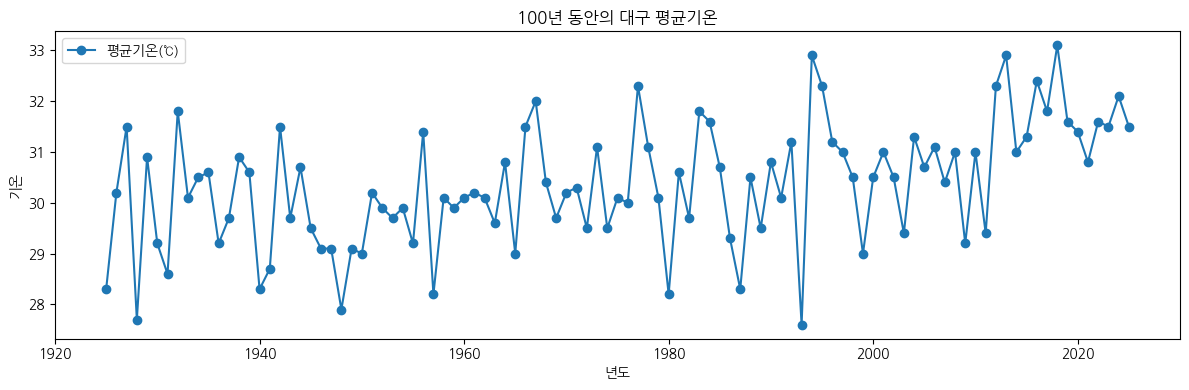

In [35]:
daeguDF['날짜'] = pd.to_datetime(daeguDF['날짜'])

daeguDF['year'] = daeguDF['날짜'].dt.year

d_max = daeguDF.groupby(['year']).max(numeric_only=True)
d_max

plt.figure(figsize=(12,4))
plt.plot(d_max.index, d_max['평균기온(℃)'],'-o')
plt.ylabel('기온')
plt.xlabel('년도')
plt.title('100년 동안의 대구 평균기온')
plt.tight_layout()
plt.legend(['평균기온(℃)'])
plt.show()